In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import plots
import seaborn as sns

sns.set_style('ticks')
sns.set_context('notebook')
sns.set_palette('colorblind')

/Users/wfarr/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/wfarr/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
Np = 10000
H0s = 70 + 15*randn(Np)
Omh2s = 0.15 + 0.15/2*randn(Np)
Oms = Omh2s/(H0s/100)**2
while np.any(Omh2s < 0) or np.any(Oms>1):
    s = (Omh2s < 0) | (Oms > 1)
    Omh2s[s] = 0.15 + 0.15/2*randn(count_nonzero(s))
    Oms = Omh2s/(H0s/100)**2
w_ps = -1 + 0.5*randn(Np)
w_as = 0 + 0.5*randn(Np)
ws = w_ps + w_as*(1.0/(1.0+0.7) - 1)

In [6]:
z = expm1(linspace(0, log(1+2), 1000))

Hzs = []
for H, O, w, wa in zip(H0s, Oms, ws, w_as):
    c = cosmo.Flatw0waCDM(H*u.km/u.s/u.Mpc, O, w, wa)
    Hzs.append(H*c.efunc(z))
Hzs = array(Hzs)

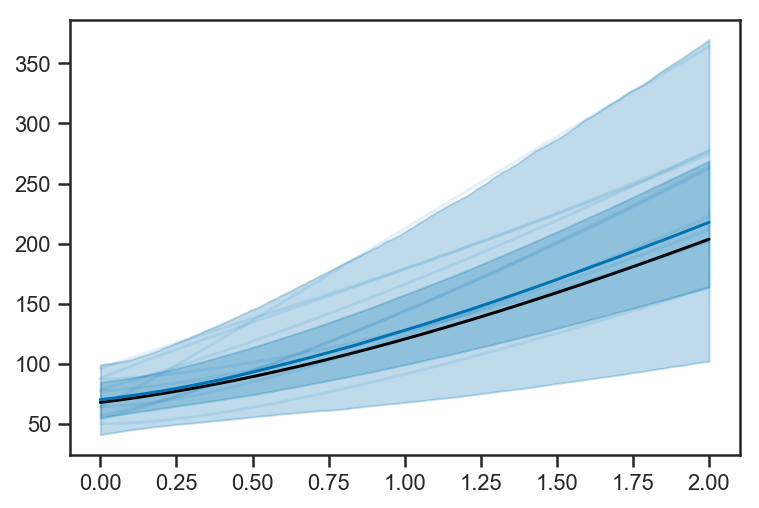

In [7]:
plot(z, Planck15.H0.to(u.km/u.s/u.Mpc).value*Planck15.efunc(z), '-k')
l, = plot(z, median(Hzs, axis=0))
fill_between(z, percentile(Hzs, 84, axis=0), percentile(Hzs, 16, axis=0), color=sns.color_palette()[0], alpha=0.25)
fill_between(z, percentile(Hzs, 97.5, axis=0), percentile(Hzs, 2.5, axis=0), color=sns.color_palette()[0], alpha=0.25)

for i in range(10):
    plot(z, Hzs[randint(Hzs.shape[0]), :], color=l.get_color(), alpha=0.1)

In [30]:
dHoH = (percentile(Hzs, 84, axis=0) - percentile(Hzs, 16, axis=0))/(2*median(Hzs, axis=0))

In [32]:
print('Relative prior uncertainty in H(z) minimized at z = {:.2f} with uncertainty {:.2f}'.format(z[argmin(dHoH)], np.min(dHoH)))

Relative prior uncertainty in H(z) minimized at z = 0.19 with uncertainty 0.20


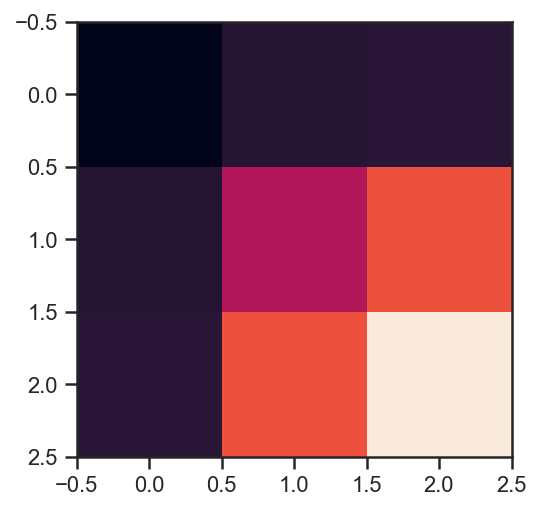

In [5]:
zs = array([0.3, 0.6, 1.0])
Hzs = []

for i in range(4000):
    c = cosmo.Flatw0waCDM(H0s[i]*u.km/u.s/u.Mpc, Oms[i], ws[i], w_as[i])
    Hzs.append(log(H0s[i]) + log(c.efunc(zs)))
Hzs = array(Hzs)

Hcov = cov(Hzs, rowvar=False)

imshow(Hcov)

In [6]:
evals, evecs = np.linalg.eigh(Hcov)

In [7]:
sqrt(evals)

array([0.01173597, 0.09650678, 0.42067781])